In [18]:
!pip install tensorflow


In [12]:
# For GPU users
# pip install tensorflow[and-cuda]
# For CPU users
!pip install tensorflow

In [14]:
!pip install tensorflow[and-cuda]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

AttributeError: module 'numpy' has no attribute 'typeDict'

In [6]:
pip install numpy==1.21.6

Note: you may need to restart the kernel to use updated packages.


Load and preprocess the CIFAR-10 dataset

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 21s 0us/step


In [8]:
y_train = y_train.reshape(-1,) #convert to 1D array
y_test = y_test.reshape(-1,)

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to the range [0, 1]

Define the network architecture

In [10]:
ffnn = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 input images
    Dense(256, activation='relu'),    # First hidden layer with ReLU activation
    Dense(128, activation='relu'),    # Second hidden layer with ReLU activation
    Dense(10, activation='softmax')    # Output layer with softmax activation for classification
])
ffnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
fitted = ffnn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3387 - accuracy: 0.5255 - val_loss: 1.4025 - val_accuracy: 0.5007
Epoch 2/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3137 - accuracy: 0.5326 - val_loss: 1.4195 - val_accuracy: 0.5029
Epoch 3/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2957 - accuracy: 0.5413 - val_loss: 1.3967 - val_accuracy: 0.5034
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2782 - accuracy: 0.5488 - val_loss: 1.4352 - val_accuracy: 0.4962
Epoch 5/100
1563/1563 [==============================] - 16s 11ms/step - loss: 1.2592 - accuracy: 0.5538 - val_loss: 1.4157 - val_accuracy: 0.5040
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2423 - accuracy: 0.5600 - val_loss: 1.5110 - val_accuracy: 0.4837
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2262 - accuracy: 0.5663 - val_loss: 1.

Evaluate the network

In [15]:
test_loss, test_acc = ffnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 2.4161 - accuracy: 0.4902
Test accuracy: 49.02%


Plot the training loss and accuracy

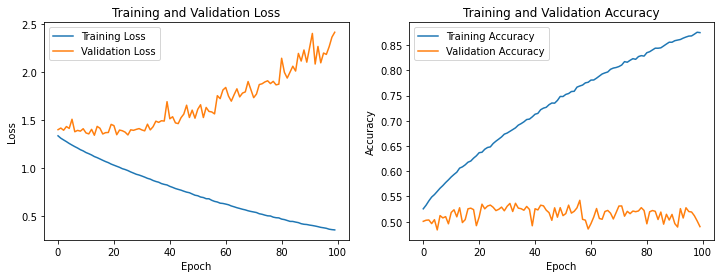

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fitted.history['loss'], label='Training Loss')
plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(fitted.history['accuracy'], label='Training Accuracy')
plt.plot(fitted.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()